In [ ]:
import yfinance
import numpy
import matplotlib
import pandas


In [ ]:
DATA_=[]

In [ ]:
ticker_symbol = "^SPX"
ticker = yfinance.Ticker(ticker_symbol)
historical_data = ticker.history(period="3y")
len(historical_data)

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']
df_3D=pandas.DataFrame()
df_7D=pandas.DataFrame()
df_3D['Close']=df['Close'].resample('3D').asfreq()
df_7D['Close']=df['Close'].resample('7D').asfreq()
df_3D=df_3D.dropna()
df_7D=df_7D.dropna()

In [ ]:
df_3D['MACD']=df_3D['Close'].rolling(window=30).mean()-df_3D['Close'].rolling(window=60).mean()
df_7D['MACD']=df_7D['Close'].rolling(window=30).mean()-df_7D['Close'].rolling(window=60).mean()
df_3D=df_3D.dropna()
df_7D=df_7D.dropna()

In [ ]:
df_7D_resampled=df_7D.reindex(df_3D.index, method='ffill')
df_spread=df_3D['MACD']-df_7D_resampled['MACD']
DATA_.append(df_spread.values)

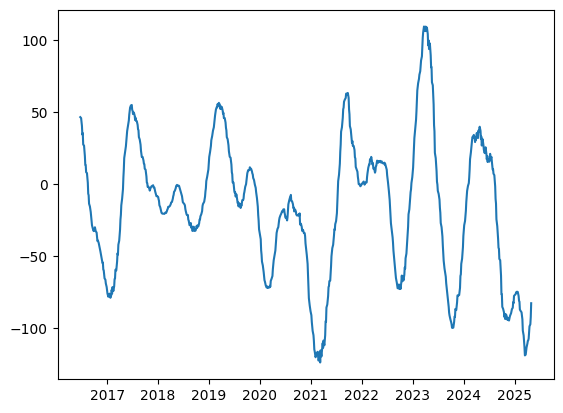

In [ ]:
matplotlib.pyplot.plot(df_spread)

In [ ]:
df=pandas.DataFrame()
df['Volume']=historical_data['Volume']

In [ ]:
df['Z_SCORE']=(df['Volume']-df['Volume'].rolling(window=200).mean())/df['Volume'].rolling(window=200).std()

DATA_.append(df['Z_SCORE'].values)

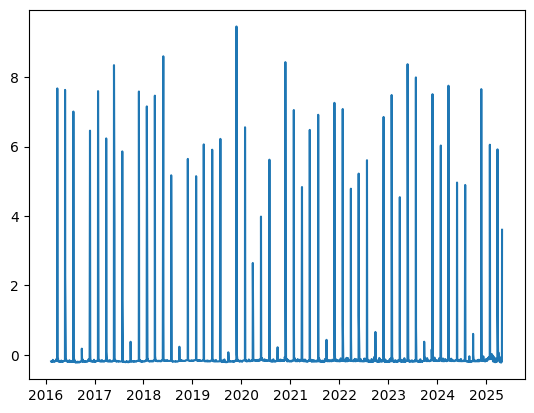

In [ ]:
matplotlib.pyplot.plot(df['Z_SCORE'])

In [ ]:
df['V_DEV']=df['Volume']/df['Volume'].rolling(window=200).mean()
DATA_.append(df['V_DEV'].values)

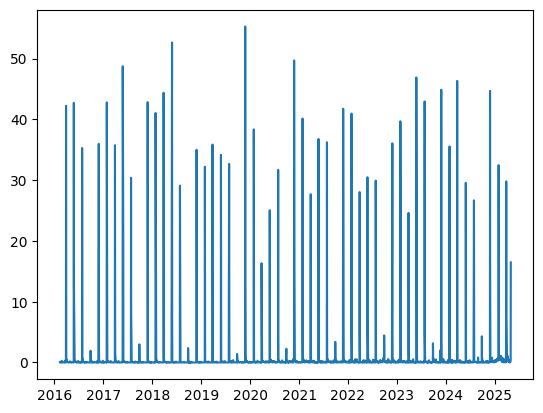

In [ ]:
matplotlib.pyplot.plot(df['V_DEV'])

In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']
df['APMR']=df['Close'].diff()/df['Close'].diff().rolling(window=21).mean()
DATA_.append(df['APMR'].values)

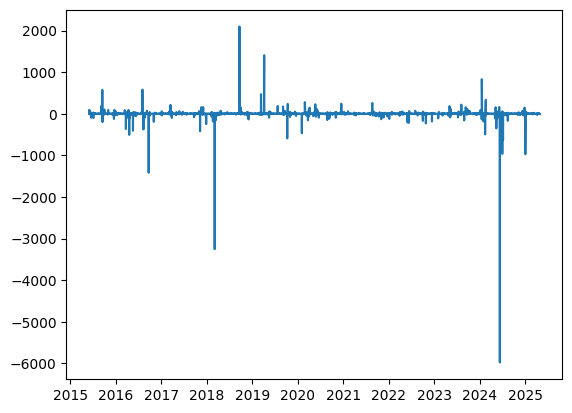

In [ ]:
matplotlib.pyplot.plot(df['APMR'])

In [ ]:
F=200
T=max([len(x)for x in DATA_])+F
X=[]
for x in DATA_:
  for i in range(T-len(x)):
    k=numpy.random.randint(0,len(x))
    x=numpy.insert(x,k,0)
  X.append(x)


In [ ]:
X=numpy.transpose(numpy.nan_to_num(numpy.array(X)))

In [ ]:
X_NORM=numpy.nan_to_num(numpy.array([(x-x.mean())/x.std() for x in X]))

<ipython-input-18-235d61a8ba71>:1: RuntimeWarning: invalid value encountered in divide
  X_NORM=numpy.nan_to_num(numpy.array([(x-x.mean())/x.std() for x in X]))
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']

In [ ]:
df['RETURN']=numpy.log(df['Close']/df['Close'].shift(1))
Y=df['RETURN'].values[:T]

In [ ]:
for i in range(T-len(Y)):
    k=numpy.random.randint(0,len(Y))
    Y=numpy.insert(Y,k,0)

In [ ]:
len(Y)

2714

In [ ]:
X.shape


(2714, 4)

In [ ]:
L=100

In [ ]:
XDATA=[]
YDATA=[]
for l in range(X_NORM.shape[0]-L):
  XDATA.append(X_NORM[l:l+L].reshape(4*L))
  YDATA.append(Y[l+L])
XDATA=numpy.array(XDATA)
YDATA=numpy.array(YDATA)

In [ ]:
len(Y)

2714

In [ ]:
len(YDATA)

2614

In [ ]:
len(XDATA)

2614

In [ ]:
XDATA=XDATA.reshape(XDATA.shape[0],XDATA.shape[1],1)

In [ ]:
XDATA[0]

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(units=L,return_sequences=True))
model.add(LSTM(units=L,return_sequences=True))
model.add(LSTM(units=L))

model.add(Dense(units=L))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(XDATA, YDATA, epochs=10, batch_size=32)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 83s 924ms/step - loss: 1.4250e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 880ms/step - loss: 8.9793e-05
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 72s 878ms/step - loss: 8.2063e-05
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 73s 885ms/step - loss: 8.8579e-05
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 85s 918ms/step - loss: 7.7480e-05
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 73s 894ms/step - loss: 8.4632e-05
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 80s 979ms/step - loss: 8.6609e-05
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 75s 897ms/step - loss: 9.0358e-05
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 72s 884ms/step - loss: 8.7700e-05
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 89s 969ms/step - loss: 7.3800e-05


In [ ]:
model.predict(numpy.transpose(XDATA[0]))[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


array([[0.00064406]], dtype=float32)